## Dataset Overview

This preprocessed Brain Tumor MRI dataset contains 7,023 T1‑weighted scans—cropped to remove black margins and resized to 224×224 pixels—each labeled as one of four classes (glioma, meningioma, pituitary tumor, or no tumor) for downstream CNN classification.


In [14]:
# cell 1: imports & paths
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import imutils    

# ─── Update these to your local paths ──────────────────────────────────────
DATA_DIR    = "/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 171/Final Project /Brain Tumor MRI Dataset"
RAW_TRAIN   = os.path.join(DATA_DIR, "Training")
RAW_TEST    = os.path.join(DATA_DIR, "Testing")
CLEAN_DIR   = os.path.join(DATA_DIR, "cleaned")    # where your crop+resize will go
IMG_SIZE    = 224
# ────────────────────────────────────────────────────────────────────────────

# make sure your output plots appear inline
%matplotlib inline


In [15]:
# cell 2: list classes and counts in the raw training set
classes = sorted(os.listdir(RAW_TRAIN))
print("Detected classes:", classes)

counts = {cls: len(os.listdir(os.path.join(RAW_TRAIN, cls))) 
          for cls in classes}
print("Training sample counts:", counts)


Detected classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Training sample counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}


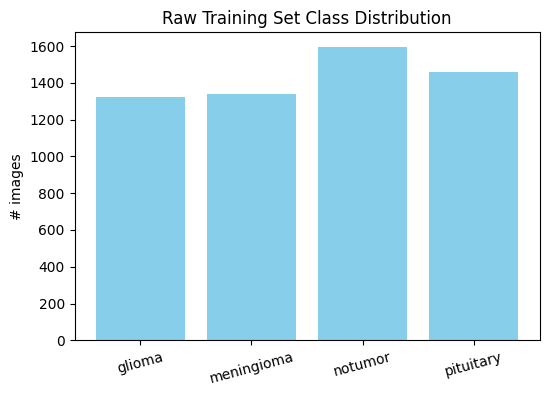

In [16]:
# cell 3: bar chart of class counts
plt.figure(figsize=(6,4))
plt.bar(counts.keys(), counts.values(), color='skyblue')
plt.title("Raw Training Set Class Distribution")
plt.ylabel("# images")
plt.xticks(rotation=15)
plt.show()


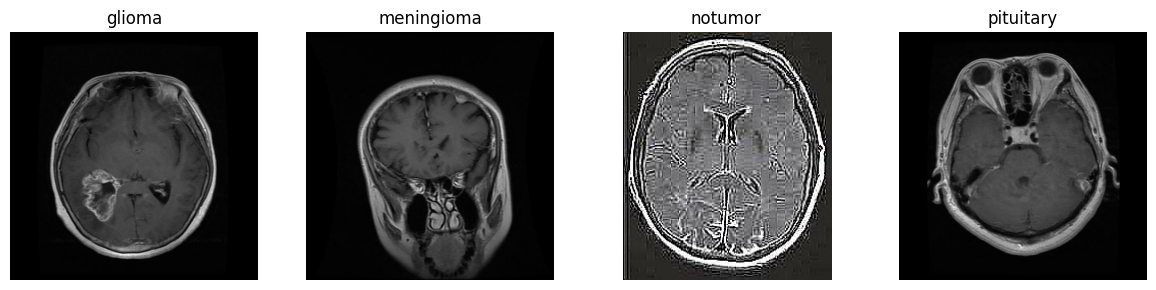

In [17]:
# cell 4: display one example per class
fig, axes = plt.subplots(1, len(classes), figsize=(12,3))
for ax, cls in zip(axes, classes):
    fn = os.listdir(os.path.join(RAW_TRAIN, cls))[0]
    img = cv2.imread(os.path.join(RAW_TRAIN, cls, fn))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis('off')
plt.tight_layout()


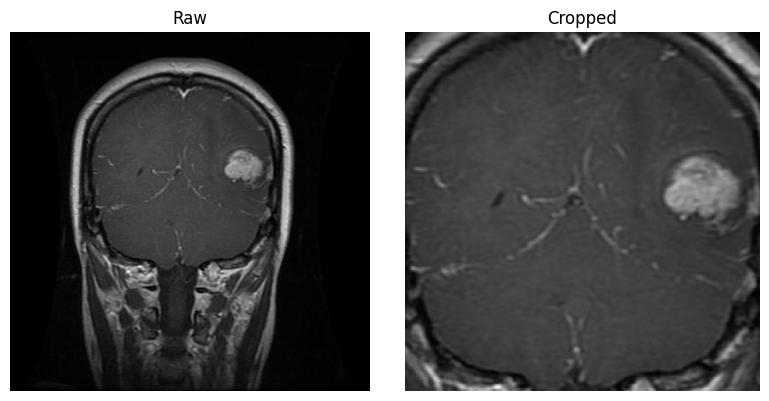

In [18]:
# cell 5: crop demo
# (you can either paste your crop_img definition here, or import it if you put it in a .py)
def crop_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3,3), 0)
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    extL = tuple(c[c[:,:,0].argmin()][0])
    extR = tuple(c[c[:,:,0].argmax()][0])
    extT = tuple(c[c[:,:,1].argmin()][0])
    extB = tuple(c[c[:,:,1].argmax()][0])
    return img[extT[1]:extB[1], extL[0]:extR[0]]

# pick a sample
cls = classes[0]
fn  = os.listdir(os.path.join(RAW_TRAIN, cls))[5]
raw = cv2.imread(os.path.join(RAW_TRAIN, cls, fn))
crop = crop_img(raw)

fig, axes = plt.subplots(1,2, figsize=(8,4))
axes[0].imshow(cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)); axes[0].set_title("Raw")
axes[1].imshow(cv2.cvtColor(crop,cv2.COLOR_BGR2RGB)); axes[1].set_title("Cropped")
for ax in axes: ax.axis('off')
plt.tight_layout()


In [19]:
# cell 6: batch preprocess into cleaned/
def preprocess_and_save(src_dir, dst_dir, img_size=IMG_SIZE):
    os.makedirs(dst_dir, exist_ok=True)
    for cls in tqdm(classes, desc=f"Processing {os.path.basename(src_dir)}"):
        in_dir  = os.path.join(src_dir, cls)
        out_dir = os.path.join(dst_dir, cls)
        os.makedirs(out_dir, exist_ok=True)
        for fn in os.listdir(in_dir):
            img = cv2.imread(os.path.join(in_dir, fn))
            if img is None:
                continue  # skip corrupted
            c = crop_img(img)
            r = cv2.resize(c, (img_size, img_size))
            cv2.imwrite(os.path.join(out_dir, fn), r)

# run preprocessing
clean_train_dir = os.path.join(DATA_DIR, "cleaned", "Training")
clean_test_dir  = os.path.join(DATA_DIR, "cleaned", "Testing")

preprocess_and_save(RAW_TRAIN, clean_train_dir)
preprocess_and_save(RAW_TEST,  clean_test_dir)


Processing Testing: 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


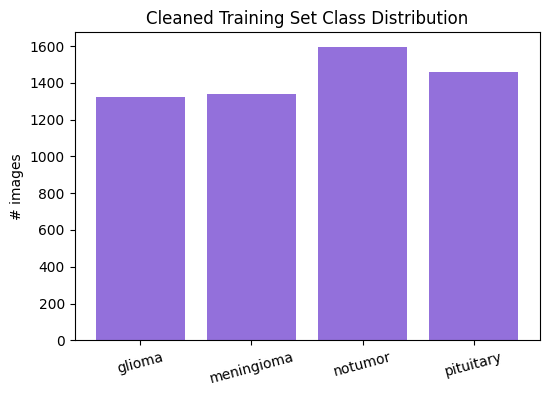

In [23]:
# cell 7: cleaned counts
clean_counts = {cls: len(os.listdir(os.path.join(clean_train_dir, cls)))
                for cls in classes}

plt.figure(figsize=(6,4))
plt.bar(clean_counts.keys(), clean_counts.values(), color='mediumpurple')
plt.title("Cleaned Training Set Class Distribution")
plt.ylabel("# images")
plt.xticks(rotation=15)
plt.show()


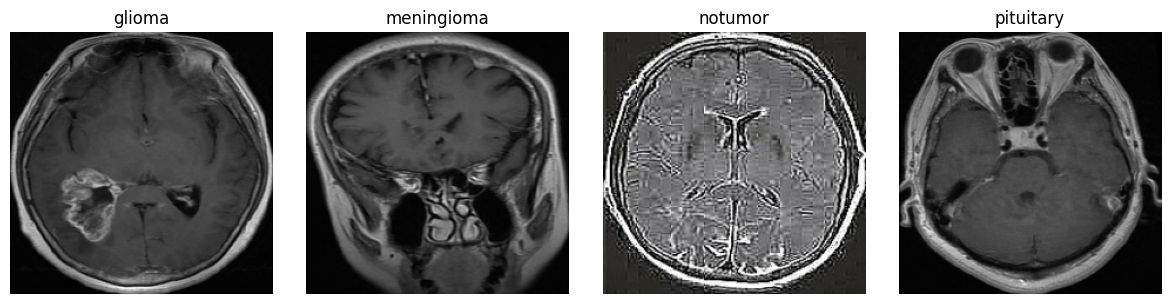

In [24]:
# cell 8: preview cleaned
fig, axes = plt.subplots(1, len(classes), figsize=(12,3))
for ax, cls in zip(axes, classes):
    fn  = os.listdir(os.path.join(clean_train_dir, cls))[0]
    img = cv2.imread(os.path.join(clean_train_dir, cls, fn))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(cls)
    ax.axis('off')
plt.tight_layout()


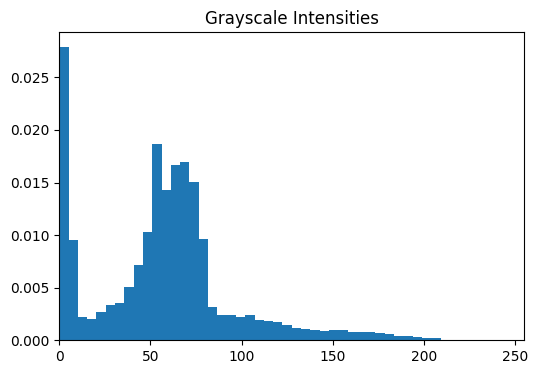

In [28]:
# cell 10: grayscale histogram
# 1) convert to gray
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# 2) make a figure/axes
fig, ax = plt.subplots(figsize=(6,4))

# 3) call your plot_hist with actual arguments: image, axis, title, vmin, vmax
plot_hist(gray, ax, "Grayscale Intensities", 0, 255)

# 4) show it
plt.show()


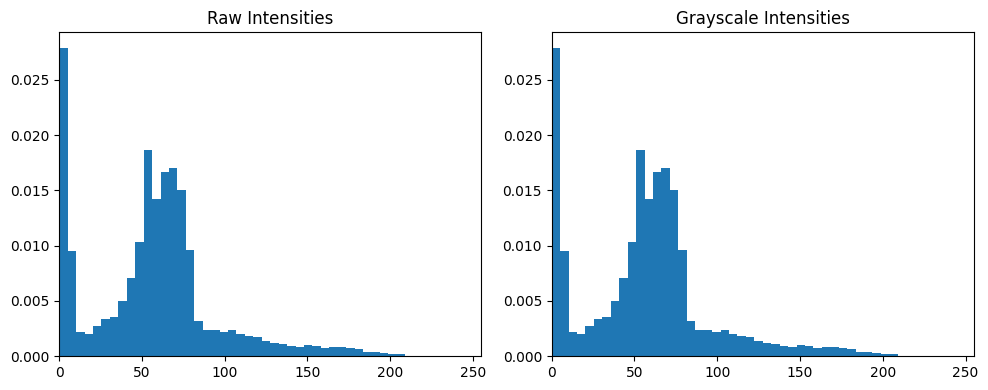

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
plot_hist(resized, ax1, "Raw Intensities",   0, 255)
plot_hist(gray,    ax2, "Grayscale Intensities", 0, 255)
plt.tight_layout()
plt.show()


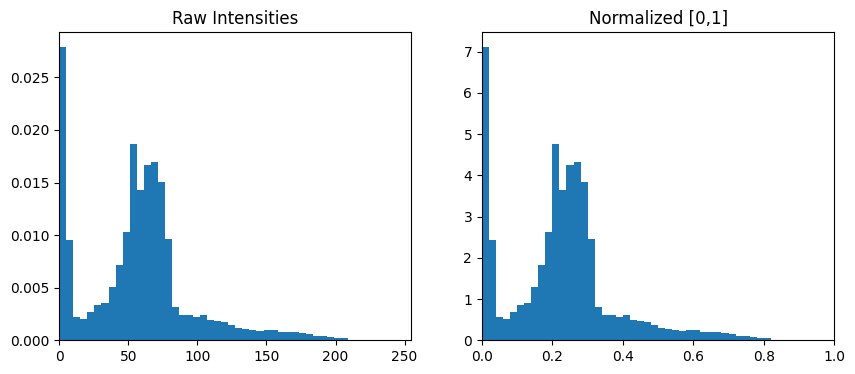

In [26]:
def plot_hist(img, ax, title, vmin=0, vmax=255):
    ax.hist(img.ravel(), bins=50, range=(vmin, vmax), density=True)
    ax.set_title(title)
    ax.set_xlim(vmin, vmax)

fig, (a1,a2) = plt.subplots(1,2, figsize=(10,4))
plot_hist(resized,                    a1, "Raw Intensities",   0, 255)
plot_hist(resized.astype(float)/255., a2, "Normalized [0,1]", 0, 1)
plt.show()


Count changes: e.g., “All 7,023 images were successfully cropped & resized. No corrupt files found.”

Visual check: “Cleaned images have uniform 224×224 size and no black margins.”

Next steps: “Now data is ready for model input. Next: set up DataLoader/DataGenerator with augmentations and begin training baseline CNN and transfer‐learning experiments.”

